In [58]:
import pandas as pd
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from tqdm import tqdm
from tensorflow.keras import applications
#from efficientnet import EfficientNetB3
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [10]:
os.listdir('../tf_workspace/AI_Project/Workspace/RFMDI Dataset')

['Evaluation_Set', 'Test_Set', 'Training_Set']

In [1]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

In [ ]:
model = EfficientNetB0(include_top=False, weights='imagenet')

!pip install -U efficientnet

In [24]:
train =pd.read_csv('../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Training_Set/RFMiD_Training_Labels.csv')
test  =pd.read_csv('../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Test_Set/RFMiD_Testing_Labels.csv')
val  =pd.read_csv('../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Evaluation_Set/RFMiD_Validation_Labels.csv')


In [13]:
train_abnrml_path='../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Training_Set/Training/abnrml'
train_nrml_path='../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Training_Set/Training/nrml'

In [15]:
x_train=[]
for img in tqdm(os.listdir(train_abnrml_path)):    
    image_path=train_abnrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)

for img in tqdm(os.listdir(train_nrml_path)):    
    image_path=train_nrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)

100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [00:40<00:00,  9.85it/s]


In [16]:
test_abnrml_path='../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Test_Set/Test/abnrml'
test_nrml_path='../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Test_Set/Test/nrml'
x_test=[]
for img in tqdm(os.listdir(test_abnrml_path)):    
    image_path=test_abnrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_test.append(img_arr)

for img in tqdm(os.listdir(test_nrml_path)):    
    image_path=test_nrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_test.append(img_arr)

100%|████████████████████████████████████████████████████████████████████████████████| 134/134 [00:18<00:00,  7.33it/s]


In [20]:
val_abnrml_path='../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Evaluation_Set/Validation/abnrml'
val_nrml_path='../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Evaluation_Set/Validation/nrml'
x_val=[]
for img in tqdm(os.listdir(val_abnrml_path)):    
    image_path=val_abnrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_val.append(img_arr)

for img in tqdm(os.listdir(val_nrml_path)):    
    image_path=val_nrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_val.append(img_arr)

100%|████████████████████████████████████████████████████████████████████████████████| 134/134 [00:16<00:00,  8.11it/s]


In [37]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [38]:
train_x.shape
test_x.shape
val_x.shape

(640, 224, 224, 3)

In [39]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [40]:
training_set.class_indices
testing_set.class_indices
valuation_set.class_indices

{'abnrml': 0, 'nrml': 1}

In [42]:
train_y=training_set.classes
test_y=testing_set.classes
val_y=valuation_set.classes

In [43]:
train_y.shape
test_y.shape
val_y.shape

(640,)

In [44]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

# Image Agumentation

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.10,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [29]:
training_set = train_datagen.flow_from_directory('../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Training_Set/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
testing_set = train_datagen.flow_from_directory('../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Test_Set/Test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
valuation_set = train_datagen.flow_from_directory('../tf_workspace/AI_Project/Workspace/RFMDI Dataset/Evaluation_Set/Validation',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 1920 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [68]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

efficient_net = EfficientNetB0(
    weights='imagenet',
    input_shape=(32,32,3),
    include_top=False,
    pooling='max'
)

model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 120, activation='relu'))
model.add(Dense(units = 60, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 1280)              4049571   
_________________________________________________________________
dense_6 (Dense)              (None, 120)               153720    
_________________________________________________________________
dense_7 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 61        
Total params: 4,210,612
Trainable params: 4,168,589
Non-trainable params: 42,023
_________________________________________________________________


In [69]:
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
history = model.fit_generator(
    training_set,
    epochs = 10,
    steps_per_epoch = 15,
    validation_data = valuation_set,
    validation_steps = 7
)

Epoch 1/10
15/15 [==============================] - 282s 19s/step - loss: 4.6960 - accuracy: 0.7229 - val_loss: 13766.2051 - val_accuracy: 0.7857
Epoch 2/10
15/15 [==============================] - 277s 18s/step - loss: 0.6336 - accuracy: 0.7875 - val_loss: 5443.5210 - val_accuracy: 0.8080
Epoch 3/10
15/15 [==============================] - 279s 19s/step - loss: 0.5379 - accuracy: 0.7708 - val_loss: 1768.5392 - val_accuracy: 0.7634
Epoch 4/10
15/15 [==============================] - 296s 20s/step - loss: 0.4848 - accuracy: 0.8062 - val_loss: 1041.8477 - val_accuracy: 0.8036
Epoch 5/10
15/15 [==============================] - 1941s 129s/step - loss: 0.4861 - accuracy: 0.8000 - val_loss: 5.9215 - val_accuracy: 0.8348
Epoch 6/10
15/15 [==============================] - 254s 17s/step - loss: 0.4954 - accuracy: 0.7792 - val_loss: 2.0241 - val_accuracy: 0.8036
Epoch 7/10
15/15 [==============================] - 275s 18s/step - loss: 0.5400 - accuracy: 0.7667 - val_loss: 5.5986 - val_accuracy

In [71]:
model.evaluate(test_x,test_y,batch_size=32)

20/20 [==============================] - 40s 2s/step - loss: 5.1129 - accuracy: 0.7906


[5.112915992736816, 0.7906249761581421]

In [72]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
print(os.getcwd())
model.save_weights("model.h5")
print("Saved model to disk")

D:\efficientnet
Saved model to disk


In [73]:
preds = model.predict_generator(
    testing_set,
    steps=len(testing_set.filenames)
)

In [ ]:
Model.predict

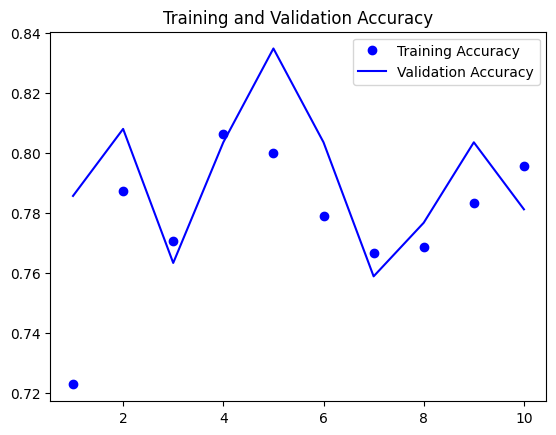

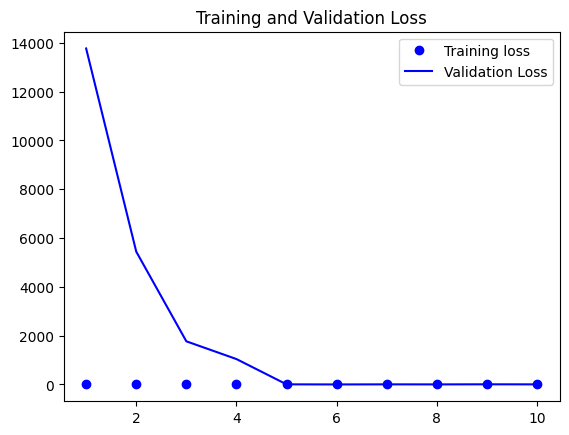

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
submission.to_csv("submission.csv", index=False)

In [75]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [76]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [77]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       640
           1       0.00      0.00      0.00         0

    accuracy                           0.79       640
   macro avg       0.50      0.40      0.44       640
weighted avg       1.00      0.79      0.88       640



In [78]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[506 134]
 [  0   0]]
